<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
# audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"

paths  = bs.Paths()              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles()

The folder has 4 songs:
1-humman.wav
2-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
3-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
4-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

The son has 6 syllables


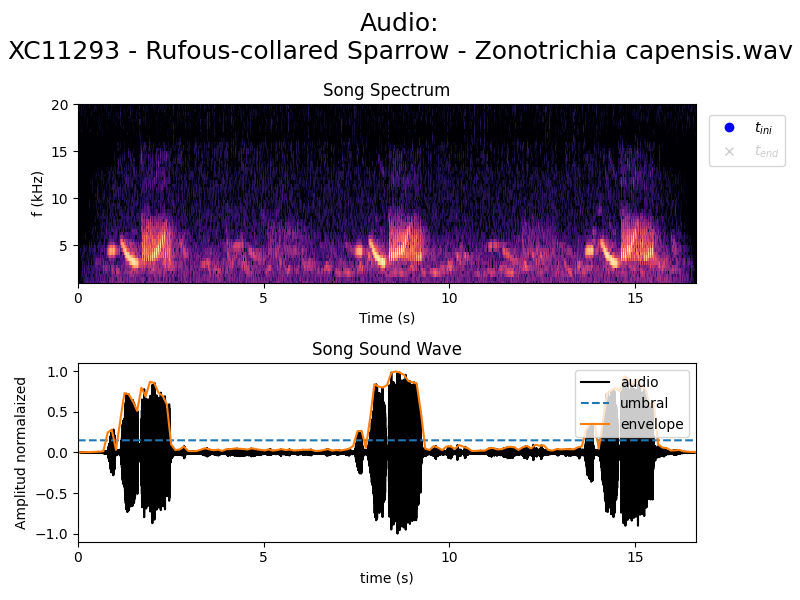

In [19]:
# no_file = int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))
birdsong = bs.BirdSong(paths, no_file=3, Nt=5000, umbral=0.15, NN=128,
               flim=(1e3,20e3), split_method="amplitud")
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

Select time inverval of interest

In [31]:
time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 1.7135 s, final time 1.7346 s


Define syllable by the previous time interval selected

In [14]:
# %%time
# syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.45, Nt=30, NN=birdsong.NN)
# ploter.Plot(syllable, SelectTime_on=True, FF_on=True)
# AudioPlay(syllable)

In [13]:
# time_interval = Positions(ploter.klicker)[0]
# print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

3D plot (in process)

In [9]:
# ploter.Plot3d(birdsong)

C:\Users\sebas\Documents\GitHub\birdsongs\birdsongs\plots.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 1, figsize=(self.figsize[0], self.figsize[1]*(2+int(syllable_on))))


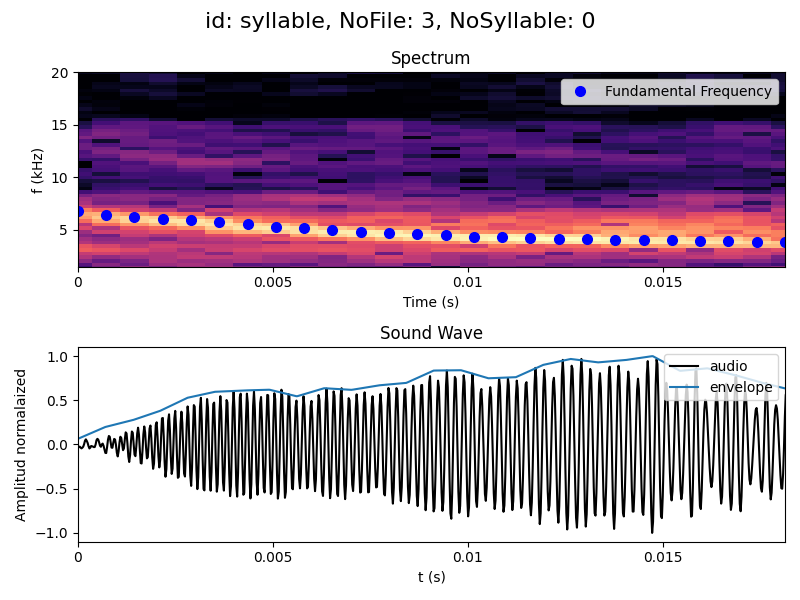

In [32]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1., Nt=30, NN=birdsong.NN)
ploter.Plot(syllable, SelectTime_on=False, FF_on=True)
AudioPlay(syllable)

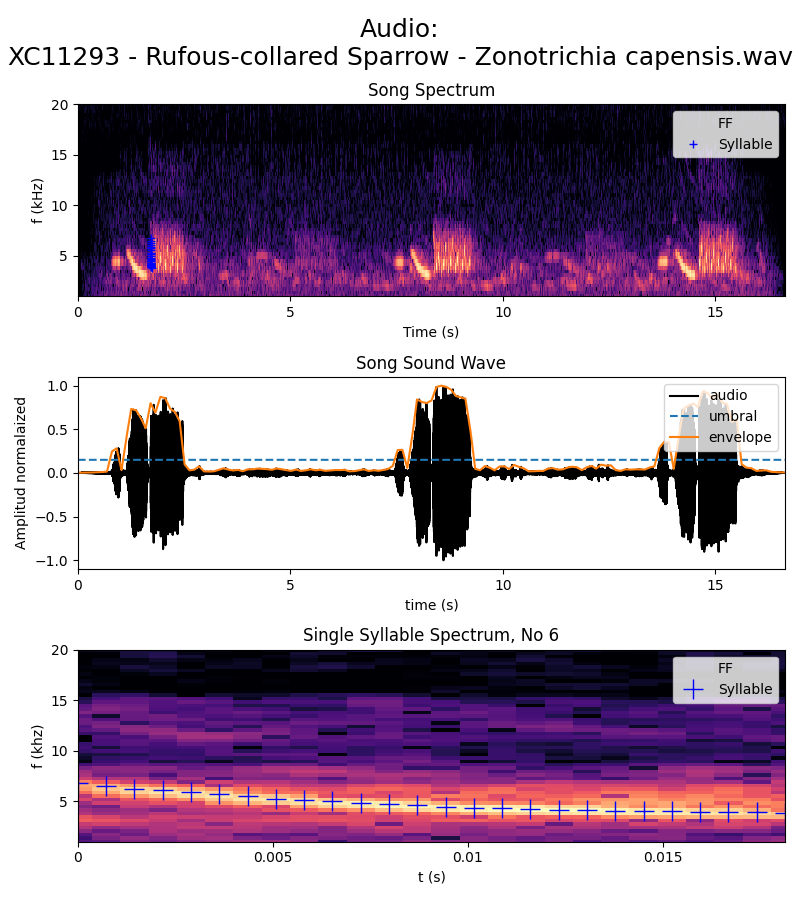

In [44]:
birdsong.syllable = syllable
ploter.Plot(birdsong, FF_on=False, SelectTime_on=False, syllable_on=True)

Define syllable with the default syllable extractor

In [ ]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [ ]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [33]:
brute     = {'method':'brute', 'Ns':11}
optimizer = bs.Optimizer(birdsong, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [34]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = optimizer.AllGammas(birdsong)

Syllable 1/6
γ* =  37000, t=4.8879 min
Syllable 2/6
γ* =  37000, t=20.5766 min
Syllable 3/6
γ* =  37000, t=4.8197 min
Syllable 4/6
γ* =  37000, t=21.4752 min
Syllable 5/6
γ* =  37000, t=6.4893 min
Syllable 6/6
γ* =  37000, t=23.2023 min
Time of execution = 81.9179 minutes


In [35]:
syllable.p["gm"].set(value=optimal_gamma)
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=37000.0 (fixed), bounds=[10000.0:100000.0]>)])

Optimal $\alpha$ and $\beta$

In [37]:
optimizer.OptimalParams(syllable, Ns=11)

As


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try incre

$a_0*$=0.1500, t=1.1008 min


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try incre

$a_1*$=0.0000, t=1.1513 min
Bs


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try incre

$b_0*$=-0.5500,
b_2*=2.4000, t=11.4138 min


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try incre

$b_1*$=0.9200, t=1.1023 min
end
Time of execution = 14.7683 minutes


C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Display optimal parameters and generate a synthetic syllable 

In [38]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Parameters([('a0', <Parameter 'a0', value=0.15000000000000002 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.55 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=0.9199999999999999 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=2.4 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=37000.0 (fixed), bounds=[10000.0:100000.0]>)])

C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Visualize and plot the synthetic syllable

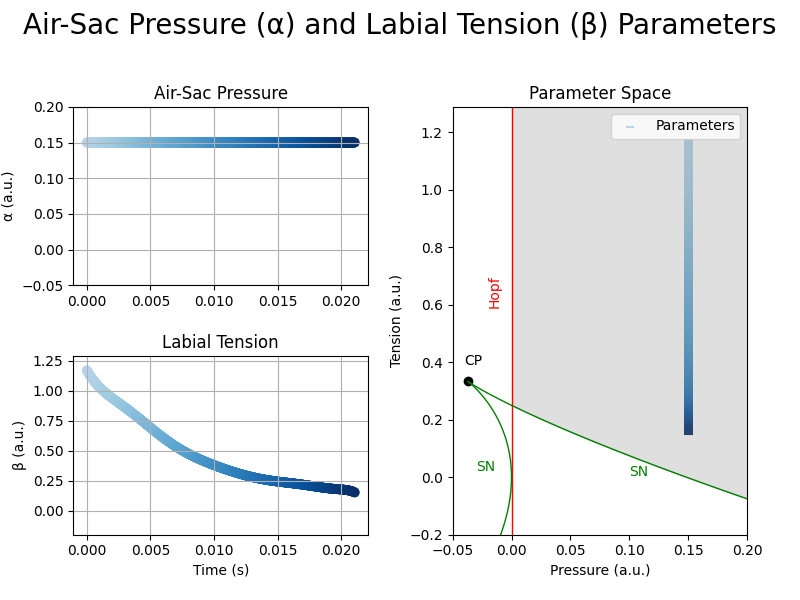

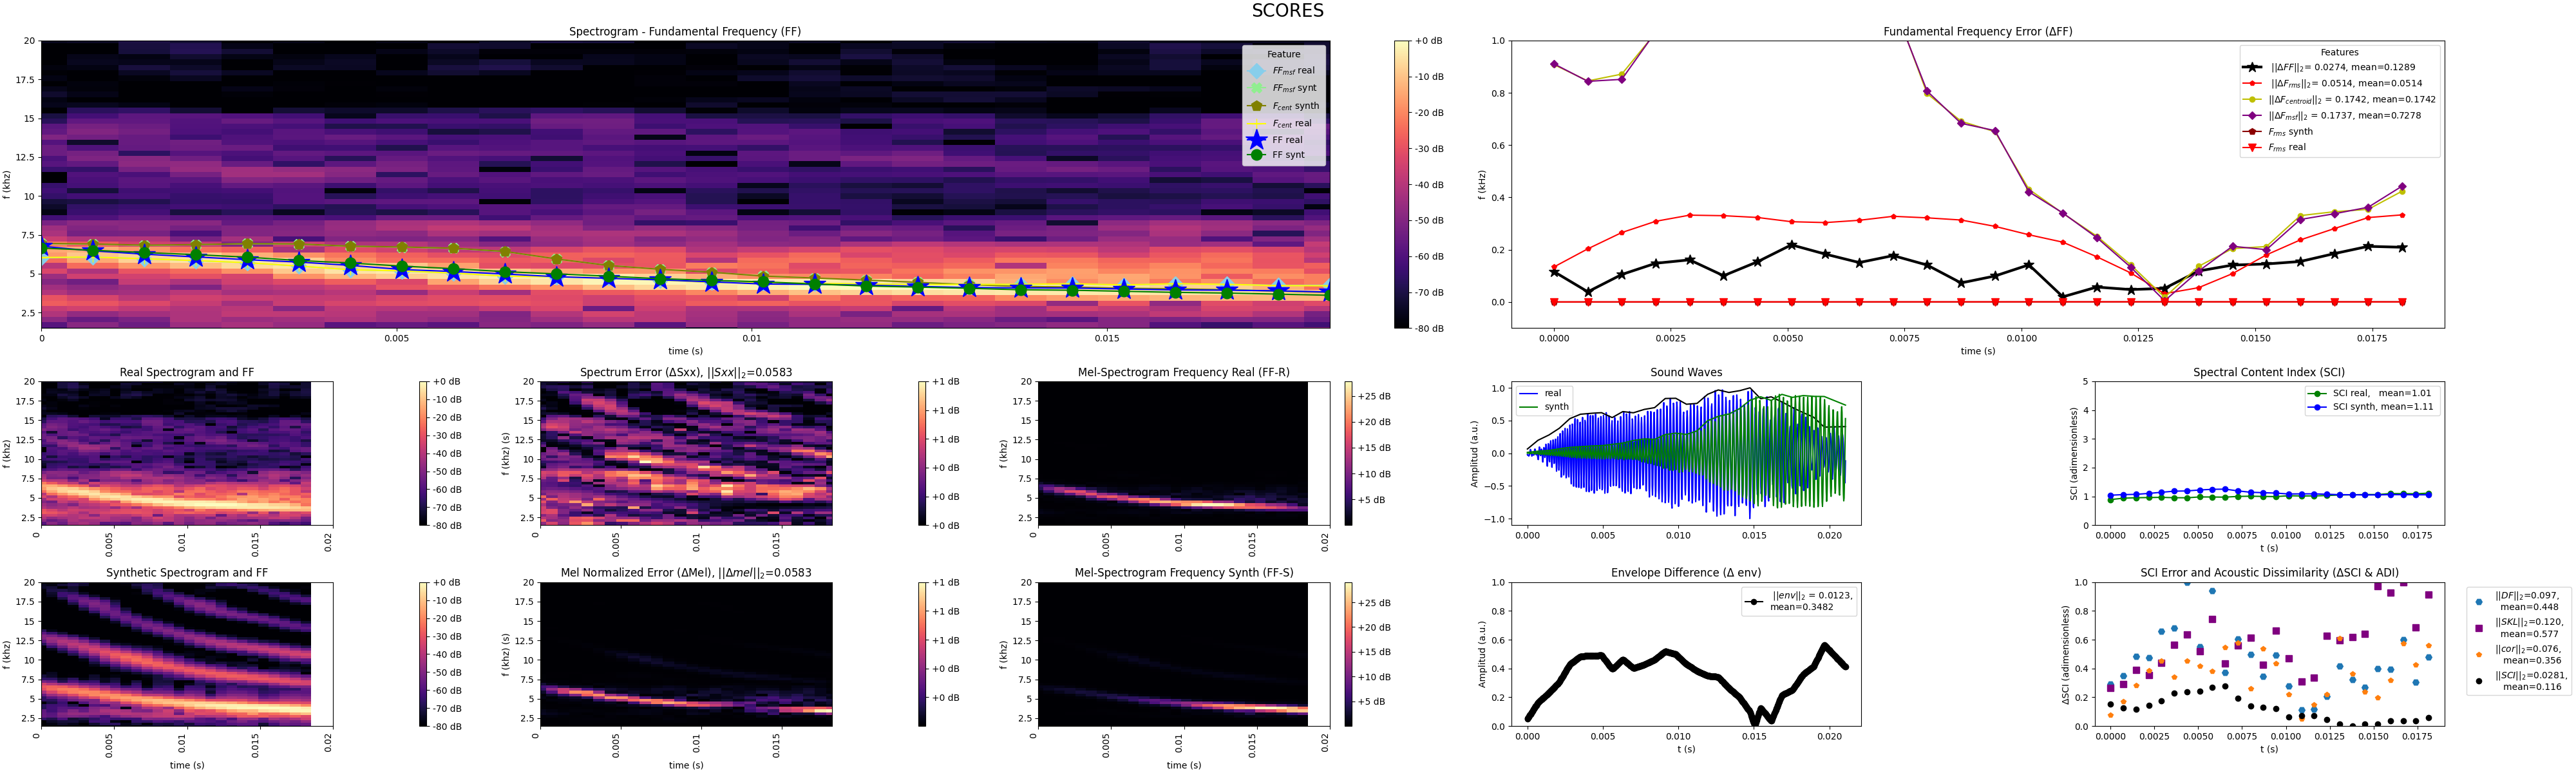

In [39]:
ploter.PlotAlphaBeta(synth_syllable)
ploter.Result(syllable, synth_syllable)
# ploter.Syllables(syllable, synth_syllable)
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [40]:
syllable.WriteAudio(); synth_syllable.WriteAudio(); 

C:\Users\sebas\anaconda3\lib\site-packages\maad\sound\input_output.py:390: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
